# Neuron

## 단순회귀모형

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

df = pd.read_csv('./datasets/scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


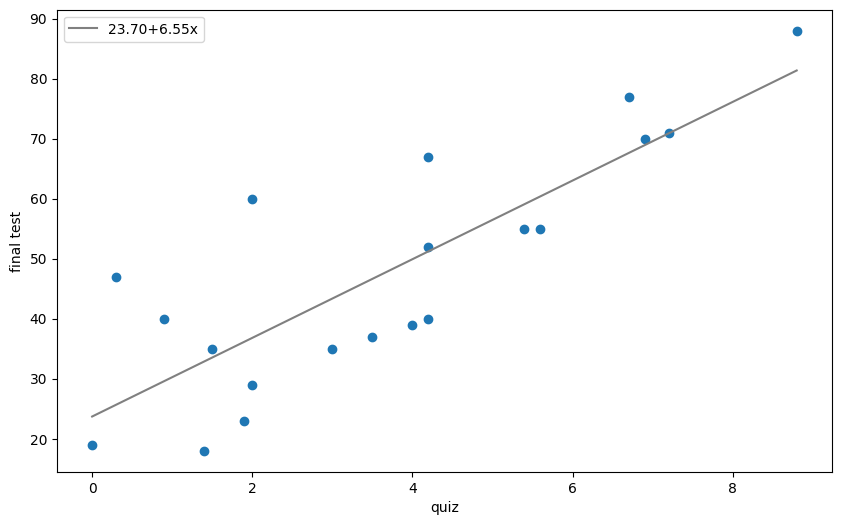

In [14]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [15]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        03:14:52   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [18]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat)

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

s_var = np.var(eps_hat, ddof=p+1)
print(s_var)

23.699495346731215 6.553732606043083
134.29043473495898


<ipython-input-18-41fbc1027546>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


In [19]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645704, 1.0685841387335373)

In [20]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl, hcl)

rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl, hcl)

13.79609127276025 33.60289942070218
4.308720637125891 8.798744574960276


In [21]:
t = beta1_hat / np.sqrt(s_var * C1)
print(t)

print((1 - rv.cdf(t)) * 2)

6.1330992745320225
8.590875866687497e-06


In [22]:
t = beta0_hat / np.sqrt(s_var * C0)
print(t )


print((1 - rv.cdf(t)) * 2)

5.0276442064401285
8.745298393209033e-05


## 다중회귀모형

In [23]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        03:21:19   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat, beta2_hat)

y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print(lcl, hcl)

-1.8709143470995777 6.428878343002363 4.1917065463986845
0.4402533325435849 7.943159760253783


<ipython-input-24-73e1ee4ef15a>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


In [25]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           7.47e-05
Time:                        03:22:30   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모형 선택

In [26]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        03:22:48   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_hat = np.array(result.fittedvalues)
print(y_hat)

eps_hat = np.array(result.resid)
print(eps_hat)

print(np.sum(eps_hat ** 2))

[51.225 70.886 23.699 43.361 33.53  29.598 36.152 46.638 49.914 59.09
 51.225 68.92  36.807 81.372 25.666 67.61  51.225 60.4   32.875 36.807]
[ 15.775   0.114  -4.699  -8.361   1.47   10.402 -13.152  -9.638 -10.914
  -4.09  -11.225   1.08   -7.807   6.628  21.334   9.39    0.775  -5.4
 -14.875  23.193]
2417.2278252292617


In [29]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

print(total_var, exp_var + unexp_var)

print(exp_var / total_var)

print(np.corrcoef(x, y)[0, 1] ** 2)

7468.55 7468.549999999996
0.6763457665504996
0.6763457665504998


In [30]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033058

In [31]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
print(f)

rv = stats.f(p, n-p-1)
print(1 - rv.cdf(f))

37.61490671126523
8.590875866687497e-06


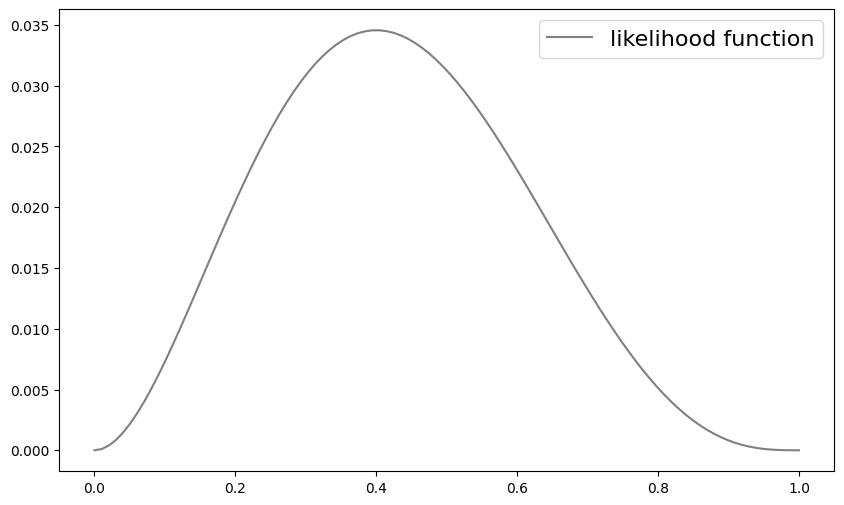

In [32]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

In [33]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
print(mll)

rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)

aic = -2 * mll + 2 * (p+1)
print(aic)

bic = -2 * mll + np.log(n) * (p+1)
print(bic)

-3.365058335046282
-76.32521428624038
156.65042857248076
158.64189311958876


In [34]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        03:28:19   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
eps_hat = np.array(result.resid)


print(stats.skew(eps_hat))

print(stats.kurtosis(eps_hat, fisher=False))

0.6599489486177468
2.4365833256763016


In [36]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508218526442302

In [37]:
df['mid_test'] = df['quiz'] * 2
df.head()

formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        03:29:29   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 데이터 준비하기

Iteration 0: Cost 895.7815, w: 2.1486, b: 0.4785
Iteration 100: Cost 99.6786, w: 9.6514, b: 7.5866
Iteration 200: Cost 82.3182, w: 8.8670, b: 11.6668
Iteration 300: Cost 72.6367, w: 8.2812, b: 14.7138
Iteration 400: Cost 67.2377, w: 7.8438, b: 16.9892
Iteration 500: Cost 64.2268, w: 7.5171, b: 18.6884
Iteration 600: Cost 62.5477, w: 7.2732, b: 19.9573
Iteration 700: Cost 61.6113, w: 7.0910, b: 20.9049
Iteration 800: Cost 61.0891, w: 6.9549, b: 21.6126
Iteration 900: Cost 60.7979, w: 6.8533, b: 22.1410


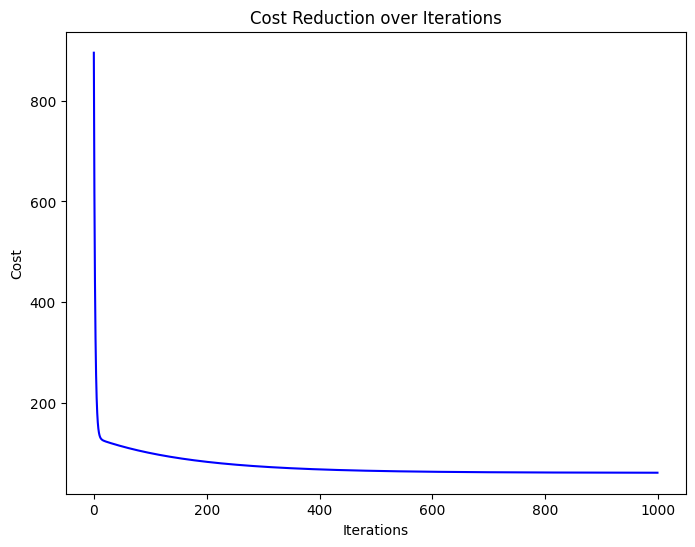

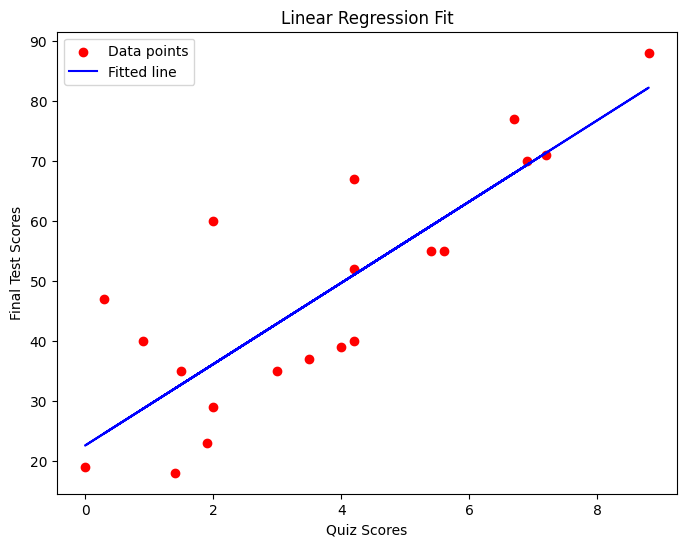

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df['quiz'].values  # 예시로 'quiz'를 독립 변수로 사용
y = df['final_test'].values  # 종속 변수

# 학습 파라미터 설정
learning_rate = 0.01
iterations = 1000

# 가중치(w)와 절편(b) 초기화
w = 0.0
b = 0.0

# 손실 함수 (평균 제곱 오차)
def compute_cost(X, y, w, b):
    n = len(y)
    cost = np.sum((w * X + b - y) ** 2) / (2 * n)
    return cost

# 경사 하강법 최적화 함수
def gradient_descent(X, y, w, b, learning_rate, iterations):
    n = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = w * X + b
        dw = (1 / n) * np.sum((y_pred - y) * X)
        db = (1 / n) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # 매 100회마다 비용 출력
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}, w: {w:.4f}, b: {b:.4f}")

    return w, b, cost_history

# 경사 하강법 실행
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

# 학습 결과 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations')
plt.show()

# 최종 모델 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X, w * X + b, color='blue', label='Fitted line')
plt.xlabel('Quiz Scores')
plt.ylabel('Final Test Scores')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

## 03-4 뉴런을 만들어봅니다

In [103]:
class Neuron:
    def __init__(self):
        self.w = 1.0  # 가중치를 초기화합니다
        self.b = 1.0  # 절편을 초기화합니다

    def forpass(self, x):
        # 정방향 계산 (예측 값 계산)
        y_hat = x * self.w + self.b  # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        # 역방향 계산 (가중치와 절편에 대한 그래디언트 계산)
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100, learning_rate=0.01):
        # 학습 과정
        for i in range(epochs):  # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다
                # 정방향 계산
                y_hat = self.forpass(x_i)
                # 오차 계산
                err = -(y_i - y_hat)
                # 역방향 계산 (그래디언트 계산)
                w_grad, b_grad = self.backprop(x_i, err)
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
            # 에포크가 끝날 때마다 진행 상황을 출력
            if i % 10 == 0:
                print(f"Epoch {i}: w = {self.w:.4f}, b = {self.b:.4f}")

    def predict(self, x):
        # 예측 메서드
        return self.forpass(x)

In [104]:
# 샘플 데이터
x = [1, 2, 3, 4]
y = [3, 5, 7, 9]  # y = 2 * x + 1

# 뉴런 생성
neuron = Neuron()

# 학습
neuron.fit(x, y, epochs=100, learning_rate=0.01)

# 예측
print(neuron.predict(5))  # 예시로 x=5일 때의 예측 값

Epoch 0: w = 1.2703, b = 1.0920
Epoch 10: w = 1.8871, b = 1.2861
Epoch 20: w = 1.9100, b = 1.2747
Epoch 30: w = 1.9158, b = 1.2584
Epoch 40: w = 1.9209, b = 1.2430
Epoch 50: w = 1.9256, b = 1.2285
Epoch 60: w = 1.9300, b = 1.2149
Epoch 70: w = 1.9342, b = 1.2021
Epoch 80: w = 1.9381, b = 1.1900
Epoch 90: w = 1.9418, b = 1.1787
10.893772926606658


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df['quiz'].values  # 예시로 'quiz'를 독립 변수로 사용
y = df['final_test'].values  # 종속 변수

print(X)
print("-" * 10)
print(y)

[4.2 7.2 0.  3.  1.5 0.9 1.9 3.5 4.  5.4 4.2 6.9 2.  8.8 0.3 6.7 4.2 5.6
 1.4 2. ]
----------
[67 71 19 35 35 40 23 37 39 55 40 70 29 88 47 77 52 55 18 60]


In [112]:
# 뉴런 생성
neuron = Neuron()

# 학습
neuron.fit(X, y, epochs=100, learning_rate=0.01)

# 예측
print(neuron.predict(4.2))  # 예시로 X=4.2일 때의 예측 값

Epoch 0: w = 10.7705, b = 4.1298
Epoch 10: w = 9.1722, b = 12.6648
Epoch 20: w = 8.2662, b = 17.3845
Epoch 30: w = 7.7647, b = 19.9966
Epoch 40: w = 7.4872, b = 21.4424
Epoch 50: w = 7.3336, b = 22.2425
Epoch 60: w = 7.2486, b = 22.6854
Epoch 70: w = 7.2015, b = 22.9305
Epoch 80: w = 7.1755, b = 23.0662
Epoch 90: w = 7.1611, b = 23.1413
53.225132456120875


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df['quiz'].values  # 'quiz'를 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 출력 (확인용)
print("독립 변수 X:", X)
print("-" * 10)
print("종속 변수 y:", y)

# 뉴런 생성
neuron = Neuron()

# 학습
neuron.fit(X, y, epochs=100, learning_rate=0.01)

# 예측
predicted_value = neuron.predict(4.2)  # 예시로 x=4.2일 때 예측 값
print("x=4.2에 대한 예측 값:", predicted_value)


독립 변수 X: [4.2 7.2 0.  3.  1.5 0.9 1.9 3.5 4.  5.4 4.2 6.9 2.  8.8 0.3 6.7 4.2 5.6
 1.4 2. ]
----------
종속 변수 y: [67 71 19 35 35 40 23 37 39 55 40 70 29 88 47 77 52 55 18 60]
Epoch 0: w = 10.7705, b = 4.1298
Epoch 10: w = 9.1722, b = 12.6648
Epoch 20: w = 8.2662, b = 17.3845
Epoch 30: w = 7.7647, b = 19.9966
Epoch 40: w = 7.4872, b = 21.4424
Epoch 50: w = 7.3336, b = 22.2425
Epoch 60: w = 7.2486, b = 22.6854
Epoch 70: w = 7.2015, b = 22.9305
Epoch 80: w = 7.1755, b = 23.0662
Epoch 90: w = 7.1611, b = 23.1413
x=4.2에 대한 예측 값: 53.225132456120875


In [114]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

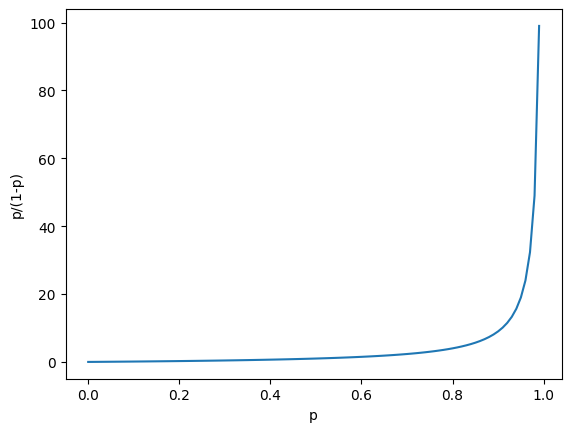

In [116]:
probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

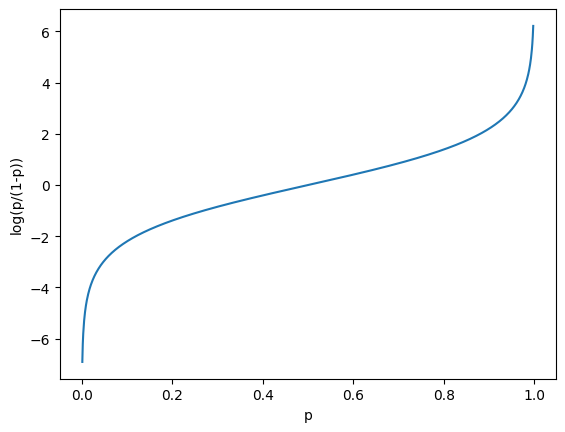

In [117]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

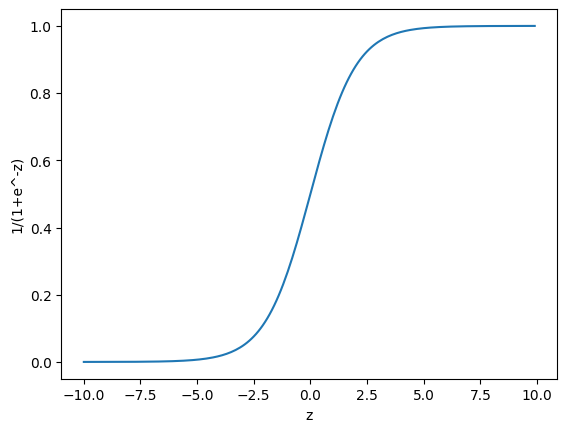

In [118]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

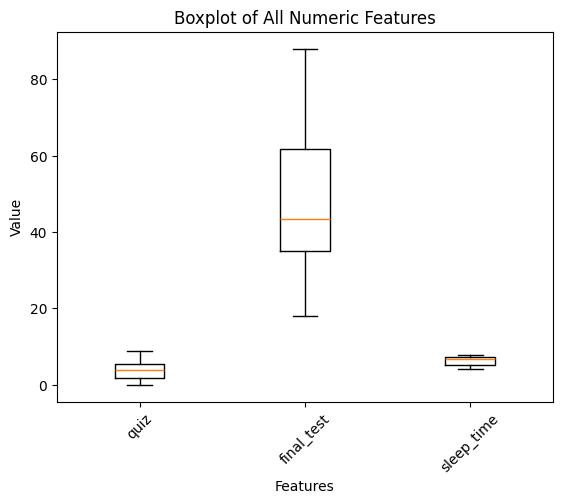

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./datasets/scores_reg.csv')

# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# Draw boxplot for all numeric columns
plt.boxplot(numeric_df.values)
plt.xticks(ticks=np.arange(1, len(numeric_df.columns) + 1), labels=numeric_df.columns, rotation=45)  # Set x-axis labels
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Boxplot of All Numeric Features')
plt.show()

In [125]:
import numpy as np

# 데이터 생성 (예시 데이터)
# 입력 데이터 x: (샘플 수, 특성 수) 형태
# 타깃 데이터 y: (샘플 수, ) 형태
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND 게이트 데이터
y = np.array([0, 0, 0, 1])                      # AND 게이트 타깃

# LogisticNeuron 클래스 정의
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, learning_rate=0.1):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다
        self.b = 0                    # 절편을 초기화합니다
        for i in range(epochs):  # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)       # 정방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y_i - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
            # 에포크가 끝날 때마다 진행 상황 출력
            if i % 10 == 0:
                print(f"Epoch {i}: w = {self.w}, b = {self.b}")

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        a = self.activation(np.array(z))      # 활성화 함수 적용
        return a > 0.5                        # 0.5를 기준으로 클래스 예측

# LogisticNeuron 객체 생성
neuron = LogisticNeuron()

# 모델 학습
neuron.fit(x, y, epochs=100, learning_rate=0.1)

# 예측 수행
predictions = neuron.predict(x)
print("Predictions:", predictions)

Epoch 0: w = [0.945 0.944], b = -0.1768340809152024
Epoch 10: w = [0.781 0.769], b = -1.1866484200667962
Epoch 20: w = [0.91  0.893], b = -1.6112244688888897
Epoch 30: w = [1.083 1.063], b = -1.8985188468477034
Epoch 40: w = [1.252 1.23 ], b = -2.1406204286616153
Epoch 50: w = [1.409 1.386], b = -2.3594298180223956
Epoch 60: w = [1.553 1.53 ], b = -2.561766307448906
Epoch 70: w = [1.687 1.663], b = -2.750728800603065
Epoch 80: w = [1.812 1.788], b = -2.9282698136977627
Epoch 90: w = [1.928 1.904], b = -3.0958468625669116
Predictions: [False False False  True]


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 분할
# 데이터 분할 (stratify 옵션 제거)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 출력 (확인용)
print("독립 변수 X:", X)
print("-" * 10)
print("종속 변수 y:", y)

# LogisticNeuron 클래스 정의
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, learning_rate=0.1):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다
        self.b = 0                    # 절편을 초기화합니다
        for i in range(epochs):  # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)       # 정방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y_i - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
            # 에포크가 끝날 때마다 진행 상황 출력
            if i % 10 == 0:
                print(f"Epoch {i}: w = {self.w}, b = {self.b}")

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        a = self.activation(np.array(z))      # 활성화 함수 적용
        return a > 0.5                        # 0.5를 기준으로 클래스 예측

# LogisticNeuron 객체 생성
neuron = LogisticNeuron()

# 모델 학습
neuron.fit(x_train, y_train, epochs=100, learning_rate=0.1)

# 예측 (단일 값 예측)
predicted_value = neuron.predict(np.array([[4.2]]))  # 배열 형태로 전달
print("x=4.2에 대한 예측 값:", predicted_value)


독립 변수 X: [[4.2]
 [7.2]
 [0. ]
 [3. ]
 [1.5]
 [0.9]
 [1.9]
 [3.5]
 [4. ]
 [5.4]
 [4.2]
 [6.9]
 [2. ]
 [8.8]
 [0.3]
 [6.7]
 [4.2]
 [5.6]
 [1.4]
 [2. ]]
----------
종속 변수 y: [67 71 19 35 35 40 23 37 39 55 40 70 29 88 47 77 52 55 18 60]
Epoch 0: w = [264.087], b = 67.10179862202914
Epoch 10: w = [2894.887], b = 738.1017986220286
Epoch 20: w = [5525.687], b = 1409.1017986220302
Epoch 30: w = [8156.487], b = 2080.101798622034
Epoch 40: w = [10787.287], b = 2751.1017986220377
Epoch 50: w = [13418.087], b = 3422.1017986220413
Epoch 60: w = [16048.887], b = 4093.101798622045
Epoch 70: w = [18679.687], b = 4764.10179862203
Epoch 80: w = [21310.487], b = 5435.101798622016
Epoch 90: w = [23941.287], b = 6106.101798622001
x=4.2에 대한 예측 값: [ True]


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 분할
# 데이터 분할 (stratify 옵션 제거)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [137]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        for i in range(epochs):                    # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:                      # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])             # 정방향 계산
                a = self.activation(z)             # 활성화 함수 적용
                err = -(y[i] - a)                  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad                   # 가중치 업데이트
                self.b -= b_grad                   # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]     # 정방향 계산
        return np.array(z) > 0                   # 스텝 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [138]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.0

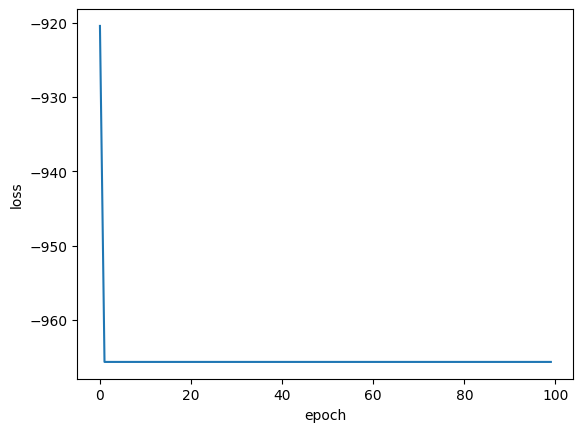

In [135]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 이진화 (로지스틱 회귀 모델의 타겟 값으로 변환 필요 시)
y = (y > y.mean()).astype(int)  # y의 평균을 기준으로 0과 1로 분류

# 데이터 분할 (stratify 옵션 제거)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, learning_rate=0.1):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다
        self.b = 0                    # 절편을 초기화합니다
        for epoch in range(epochs):   # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞습니다
            for i in indexes:          # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])  # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y[i] - a)       # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1 - 1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss / len(y))
            print(f"Epoch {epoch}: Loss = {self.losses[-1]}")

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        a = self.activation(np.array(z))
        return a > 0.5  # 0.5를 기준으로 예측 (True/False)

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

# SingleLayer 객체 생성 및 학습
layer = SingleLayer()
layer.fit(x_train, y_train)

# 모델 평가
accuracy = layer.score(x_test, y_test)
print("Test accuracy:", accuracy)


Epoch 0: Loss = 0.9466891455092347
Epoch 1: Loss = 0.6816450640097813
Epoch 2: Loss = 0.6662014239181037
Epoch 3: Loss = 0.632944483424889
Epoch 4: Loss = 0.6214382759486429
Epoch 5: Loss = 0.6211295120743321
Epoch 6: Loss = 0.5055570954294168
Epoch 7: Loss = 0.5307871426812117
Epoch 8: Loss = 0.508588383932146
Epoch 9: Loss = 0.5237468404042744
Epoch 10: Loss = 0.509990511380357
Epoch 11: Loss = 0.47978881218460045
Epoch 12: Loss = 0.4919992837735547
Epoch 13: Loss = 0.4063728690230939
Epoch 14: Loss = 0.4907256977040049
Epoch 15: Loss = 0.488469877763021
Epoch 16: Loss = 0.4152647854571958
Epoch 17: Loss = 0.37622465229319113
Epoch 18: Loss = 0.47462394189129076
Epoch 19: Loss = 0.4837806575958851
Epoch 20: Loss = 0.4458433944811401
Epoch 21: Loss = 0.4615574868502646
Epoch 22: Loss = 0.45187415617001575
Epoch 23: Loss = 0.44856939519158284
Epoch 24: Loss = 0.433561376739923
Epoch 25: Loss = 0.36623917446400484
Epoch 26: Loss = 0.4482101740987224
Epoch 27: Loss = 0.4153657394436285
E

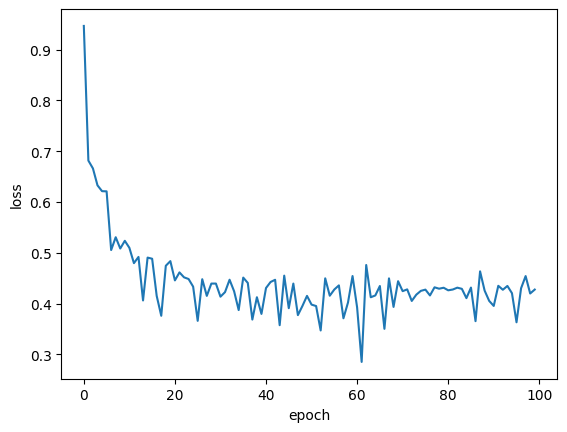

In [141]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [143]:
# 예측 (단일 입력 값을 배열로 변환)
predicted_value = layer.predict(np.array([[4.2]]))  # 2차원 배열 형태로 전달
print("x=4.2에 대한 예측 값:", predicted_value)

x=4.2에 대한 예측 값: [ True]


In [145]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100, learning_rate=0.1):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다
        self.b = 0                    # 절편을 초기화합니다
        for epoch in range(epochs):   # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞습니다
            for i in indexes:          # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])  # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y[i] - a)       # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1 - 1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss / len(y))
            print(f"Epoch {epoch}: Loss = {self.losses[-1]}")

    def predict(self, x):
        # 단일 값일 경우 배열로 변환
        if isinstance(x, (int, float)):
            x = np.array([[x]])  # 2차원 배열로 변환
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z)  # 활성화 함수 적용 없이 선형 계산 결과 반환

# SingleLayer 객체 생성 및 학습
layer = SingleLayer()
layer.fit(x_train, y_train)

# 예측 (단일 값 예측)
predicted_value = layer.predict(np.array([[4.2]]))  # 예시로 x=4.2일 때 예측 값
print("Predicted value for x=4.2:", predicted_value[0])

Epoch 0: Loss = 0.9628232890950448
Epoch 1: Loss = 0.7314357866240793
Epoch 2: Loss = 0.6219704840474816
Epoch 3: Loss = 0.6529911346087534
Epoch 4: Loss = 0.6054218114719468
Epoch 5: Loss = 0.5357015358570288
Epoch 6: Loss = 0.5884584668331331
Epoch 7: Loss = 0.5369903565349285
Epoch 8: Loss = 0.4516896807143801
Epoch 9: Loss = 0.5057122604605914
Epoch 10: Loss = 0.49426332320540844
Epoch 11: Loss = 0.4996666119694279
Epoch 12: Loss = 0.4736172765264926
Epoch 13: Loss = 0.4931312232220368
Epoch 14: Loss = 0.48033371451070195
Epoch 15: Loss = 0.43948099288635006
Epoch 16: Loss = 0.4164216250303994
Epoch 17: Loss = 0.4710014996963826
Epoch 18: Loss = 0.3778463871338034
Epoch 19: Loss = 0.3888427659077733
Epoch 20: Loss = 0.46757202508782447
Epoch 21: Loss = 0.45320094425484647
Epoch 22: Loss = 0.45989178671727765
Epoch 23: Loss = 0.45122895755645187
Epoch 24: Loss = 0.43688027007804886
Epoch 25: Loss = 0.45153975229277227
Epoch 26: Loss = 0.42338086814838427
Epoch 27: Loss = 0.445923323

```
예측 값이 기대와 크게 다른 이유는 학습 과정 중 학습률이나 가중치 초기화 방식 등이 적절하지 않기 때문일 수 있습니다. 또한, 로지스틱 회귀 대신 선형 회귀 모델로 수정해야 할 수도 있습니다.

아래는 이를 해결하기 위해 SingleLayer 클래스를 선형 회귀 방식으로 변경하고, 활성화 함수(activation)를 제거하여 예측 값을 직접 출력하는 코드입니다.

활성화 함수 제거: 로지스틱 회귀 모델이 아닌 선형 회귀 모델로 사용하기 위해 활성화 함수를 제거합니다.
학습률 및 가중치 업데이트: 학습률을 적절하게 조정합니다.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100, learning_rate=0.01):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다
        self.b = 0                    # 절편을 초기화합니다
        for epoch in range(epochs):   # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞습니다
            for i in indexes:          # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])  # 정방향 계산
                err = -(y[i] - z)       # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                # 가중치와 절편 업데이트
                self.w -= learning_rate * w_grad
                self.b -= learning_rate * b_grad
                # MSE 손실 계산
                loss += err ** 2
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss / len(y))
            print(f"Epoch {epoch}: Loss = {self.losses[-1]}")

    def predict(self, x):
        # 단일 값일 경우 배열로 변환
        if isinstance(x, (int, float)):
            x = np.array([[x]])  # 2차원 배열로 변환
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z)  # 예측 값 반환

# SingleLayer 객체 생성 및 학습
layer = SingleLayer()
layer.fit(x_train, y_train, epochs=1000, learning_rate=0.01)  # 학습률과 에포크 수를 조정

# 예측 (단일 값 예측)
predicted_value = layer.predict(np.array([[4.2]]))  # 예시로 x=4.2일 때 예측 값
print("Predicted value for x=4.2:", predicted_value[0])


Epoch 0: Loss = 640.705375339492
Epoch 1: Loss = 279.83592195771195
Epoch 2: Loss = 259.47051578803115
Epoch 3: Loss = 247.56744166810543
Epoch 4: Loss = 234.79760645274484
Epoch 5: Loss = 222.31288780625388
Epoch 6: Loss = 212.4639244590639
Epoch 7: Loss = 202.95034113847765
Epoch 8: Loss = 195.63185868327497
Epoch 9: Loss = 189.32354726740834
Epoch 10: Loss = 178.8075477742587
Epoch 11: Loss = 176.21053796782667
Epoch 12: Loss = 169.27495467537074
Epoch 13: Loss = 166.80040395630223
Epoch 14: Loss = 165.37623258861618
Epoch 15: Loss = 161.96522448957774
Epoch 16: Loss = 156.55214519253315
Epoch 17: Loss = 157.8714406189544
Epoch 18: Loss = 153.29737335382475
Epoch 19: Loss = 153.11971942222817
Epoch 20: Loss = 146.22482667963604
Epoch 21: Loss = 149.96888501854997
Epoch 22: Loss = 147.75053250731588
Epoch 23: Loss = 146.93029267527515
Epoch 24: Loss = 145.77263629367602
Epoch 25: Loss = 142.96211630973457
Epoch 26: Loss = 145.55315955411936
Epoch 27: Loss = 140.88997775076257
Epoch 2

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y,
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4, 20]

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

NameError: name 'x_val' is not defined

In [147]:
class DualLayer(SingleLayer):

    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에 페널티 항의 미분 값을 더합니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [148]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train,
               x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

NameError: name 'x_train_scaled' is not defined

In [ ]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

Epoch 0: Train Loss = 2.6129
Epoch 1000: Train Loss = 0.3654
Epoch 2000: Train Loss = 0.3582
Epoch 3000: Train Loss = 0.3542
Epoch 4000: Train Loss = 0.3515
Epoch 5000: Train Loss = 0.3494
Epoch 6000: Train Loss = 0.3477
Epoch 7000: Train Loss = 0.3462
Epoch 8000: Train Loss = 0.3449
Epoch 9000: Train Loss = 0.3438
Epoch 10000: Train Loss = 0.3428
Epoch 11000: Train Loss = 0.3419
Epoch 12000: Train Loss = 0.3412
Epoch 13000: Train Loss = 0.3406
Epoch 14000: Train Loss = 0.3401
Epoch 15000: Train Loss = 0.3396
Epoch 16000: Train Loss = 0.3392
Epoch 17000: Train Loss = 0.3389
Epoch 18000: Train Loss = 0.3386
Epoch 19000: Train Loss = 0.3384
Validation accuracy: 0.75


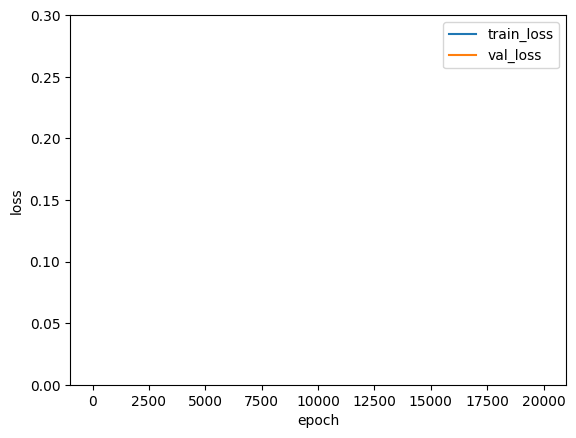

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv('./datasets/scores_reg.csv')

# 독립 변수와 종속 변수 설정
X = df[['quiz']].values  # 'quiz'를 2차원 배열로 설정하여 독립 변수로 사용
y = df['final_test'].values  # 'final_test'를 종속 변수로 사용

# 데이터 이진화 (로지스틱 회귀 모델의 타깃 값으로 변환 필요 시)
y = (y > y.mean()).astype(int)  # y의 평균을 기준으로 0과 1로 분류

# 데이터 분할
x_train_all, x_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

class DualLayer:
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units               # 은닉층의 뉴런 개수
        self.lr = learning_rate          # 학습률
        self.l1 = l1                     # L1 손실 하이퍼파라미터
        self.l2 = l2                     # L2 손실 하이퍼파라미터
        self.w1, self.b1 = None, None    # 은닉층의 가중치와 절편
        self.w2, self.b2 = None, None    # 출력층의 가중치와 절편
        self.a1 = None                   # 은닉층의 활성화 출력
        self.losses = []                 # 훈련 손실
        self.val_losses = []             # 검증 손실

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1          # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)              # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2    # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)  # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        return 1 / (1 + np.exp(-z))  # 시그모이드 계산

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1) if y_val is not None else None
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        for epoch in range(epochs):
            # 훈련
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1 - 1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 손실 계산
            if x_val is not None and y_val is not None:
                self.update_val_loss(x_val, y_val)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Train Loss = {self.losses[-1]:.4f}")

    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에 페널티 항의 미분 값을 더합니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1 ** 2) + np.sum(self.w2 ** 2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a, 1e-10, 1 - 1e-10)
        val_loss = np.sum(-(y_val * np.log(a) + (1 - y_val) * np.log(1 - a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

    def predict(self, x):
        z = self.forpass(x)         # 정방향 계산
        a = self.activation(z)      # 활성화 함수 적용
        return a                    # 확률 값 반환 (로지스틱 회귀의 경우)

    def score(self, x, y):
        z = self.forpass(x)
        a = self.activation(z)
        return np.mean((a > 0.5) == y)

# DualLayer 객체 생성 및 학습
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=20000)

# 검증 세트 정확도
accuracy = dual_layer.score(x_val_scaled, y_val)
print("Validation accuracy:", accuracy)

# 손실 그래프
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses, label='train_loss')
plt.plot(dual_layer.val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [155]:
# DualLayer 객체 생성 및 학습
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=20000)

# 예측 (단일 값 예측)
predicted_value = dual_layer.predict(np.array([[4.2]]))  # 예시로 x=4.2일 때 예측 값
print("Predicted value for x=4.2:", predicted_value[0])

Epoch 0: Train Loss = 2.6129
Epoch 1000: Train Loss = 0.3654
Epoch 2000: Train Loss = 0.3582
Epoch 3000: Train Loss = 0.3542
Epoch 4000: Train Loss = 0.3515
Epoch 5000: Train Loss = 0.3494
Epoch 6000: Train Loss = 0.3477
Epoch 7000: Train Loss = 0.3462
Epoch 8000: Train Loss = 0.3449
Epoch 9000: Train Loss = 0.3438
Epoch 10000: Train Loss = 0.3428
Epoch 11000: Train Loss = 0.3419
Epoch 12000: Train Loss = 0.3412
Epoch 13000: Train Loss = 0.3406
Epoch 14000: Train Loss = 0.3401
Epoch 15000: Train Loss = 0.3396
Epoch 16000: Train Loss = 0.3392
Epoch 17000: Train Loss = 0.3389
Epoch 18000: Train Loss = 0.3386
Epoch 19000: Train Loss = 0.3384
Predicted value for x=4.2: [1.]
